# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, median and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [2]:
# your code here
data = pd.read_csv("progresa_sample.csv")
data_1_1 = data.drop(['year','folnum','village'], axis = 1)
# rows_with_missing_values = data_1_1[data_1_1.isnull().any(axis=1)]
# print(rows_with_missing_values)
print(data.head(3))
## 'poor' and 'progresa' include string type data, first I tried to look at different
## values of them and then I converted them into float type as mentioned
poor_values = data_1_1['poor'].unique()
print("unique values in 'poor':", poor_values)
progresa_values = data_1_1['progresa'].unique()
print("unique values in 'progresa':", progresa_values)

# Convert 'poor' column values: 'no pobre' to 0, 'pobre' to 1
data_1_1['poor'] = data_1_1['poor'].map({'no pobre': 0, 'pobre': 1})
# Convert 'progresa' column values: 'basal' to 1, '0' to 0 (assuming '0' is a string)
data_1_1['progresa'] = data_1_1['progresa'].map({'0': 0, 'basal': 1})

# print(data_1_1)
summary_1_1 = data_1_1.agg(['mean','median','std']).transpose().sort_index()
print(summary_1_1)

   year  sex  indig  dist_sec   sc  grc  fam_n   min_dist   dist_cap   poor  \
0    97  0.0    0.0     4.473  1.0  7.0      7  21.168384  21.168384  pobre   
1    98  0.0    0.0     4.473  1.0  8.0      7  21.168384  21.168384  pobre   
2    97  1.0    0.0     4.473  1.0  6.0      7  21.168384  21.168384  pobre   

   ... hohedu  hohwag  welfare_index  hohsex  hohage  age  village  folnum  \
0  ...      6     0.0          583.0     1.0    35.0   13      163       1   
1  ...      6     0.0          583.0     1.0    35.0   14      163       1   
2  ...      6     0.0          583.0     1.0    35.0   12      163       2   

   grc97  sc97  
0      7   1.0  
1      7   1.0  
2      6   1.0  

[3 rows x 21 columns]
unique values in 'poor': ['pobre' 'no pobre']
unique values in 'progresa': ['0' 'basal']
                     mean      median         std
age             11.366460   11.000000    3.167744
dist_cap       147.674452  132.001494   76.063134
dist_sec         2.418910    2.279000   

### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').



In [3]:
# your code here
## control group: without treatment & treatment group: with treatment
from scipy.stats import ttest_ind

data_1_2 = data
# year_unique = data_1_2["year"].unique()
# print(year_unique)  ##[97 98]

# data preprocessing
data_1_2['poor'] = data_1_2['poor'].map({'no pobre': 0, 'pobre': 1})
data_1_2['progresa'] = data_1_2['progresa'].map({'0': 0, 'basal': 1})
## choose the data from 1997 from poor households
data_1997_poor = data_1_2[(data_1_2.year == 97) & (data_1_2.poor == 1)]

# treatment group and control group
t_grp = data_1997_poor[data_1997_poor.progresa == 1]
c_grp = data_1997_poor[data_1997_poor.progresa == 0]

# choose the demograpphic characteristics
target_categories = sorted([col for col in data_1997_poor.columns if col not in ['year', 'folnum', 'village', 'poor', 'progresa']])

# T-Test
results = []
for type in target_categories:
    t_mean = t_grp[type].mean()
    c_mean = c_grp[type].mean()
    difference = t_mean - c_mean
    t_stat, p_value = ttest_ind(t_grp[type].dropna(), c_grp[type].dropna(), nan_policy='omit')

    results.append([type,t_mean,c_mean,difference,p_value])

outputs = pd.DataFrame(results, columns =['Variable name','Average value (Treatment villages)','Average value (Control villages)','Difference (Treat - Control)','p-value'])
print(outputs)
                       

    Variable name  Average value (Treatment villages)  \
0             age                           10.716991   
1        dist_cap                          150.829074   
2        dist_sec                            2.453122   
3           fam_n                            7.281327   
4             grc                            3.531599   
5           grc97                            3.531599   
6          hohage                           43.648828   
7          hohedu                            2.663139   
8          hohsex                            0.924656   
9          hohwag                          544.339544   
10          indig                            0.325986   
11       min_dist                          107.152915   
12             sc                            0.822697   
13           sc97                            0.822697   
14            sex                            0.519317   
15  welfare_index                          655.428377   

    Average value (Control vil

### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

In [4]:
results_1_3 = outputs[outputs['p-value']<0.05]
print(results_1_3)

    Variable name  Average value (Treatment villages)  \
1        dist_cap                          150.829074   
2        dist_sec                            2.453122   
6          hohage                           43.648828   
7          hohedu                            2.663139   
9          hohwag                          544.339544   
11       min_dist                          107.152915   
14            sex                            0.519317   
15  welfare_index                          655.428377   

    Average value (Control villages)  Difference (Treat - Control)  \
1                         153.769730                     -2.940656   
2                           2.507662                     -0.054540   
6                          44.276918                     -0.628090   
7                           2.590348                      0.072791   
9                         573.163558                    -28.824015   
11                        103.237854                      3.915060

*Discuss your results here*
* A: There're 8 different variables whose p-value are less than 0.05 between the treatment and control group at baseline, which indicates the statistically significant differences. 
* B: Baseline differences matter because they indicate pre-existing disparities between treatment and control groups before the intervention. Baseline differences between groups can confound the interpretation of post-treatment outcomes, making it challenging to attribute observed effects solely to the intervention. Significant differences at baseline can indicate problems with the randomization process, suggesting that the random assignment might not have been properly executed or that the sample size is too small to balance all covariates by chance. In some contexts, particularly in policy research and program evaluation, baseline differences might raise concerns about equity and fairness of the intervention.
* C: The The presence of statistically significant differences at baseline implies the need for careful adjustment in the impact analysis to account for these initial disparities. Also, the presence of statistically significant differences at baseline implies the need for careful adjustment in the impact analysis to account for these initial disparities. We must take these differences into account when interpreting the results to ensure the validity of the conclusions. Moreover, given the baseline differences, a DiD approach could help mitigate some concerns by focusing on changes over time within each group, assuming parallel trends. 

### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

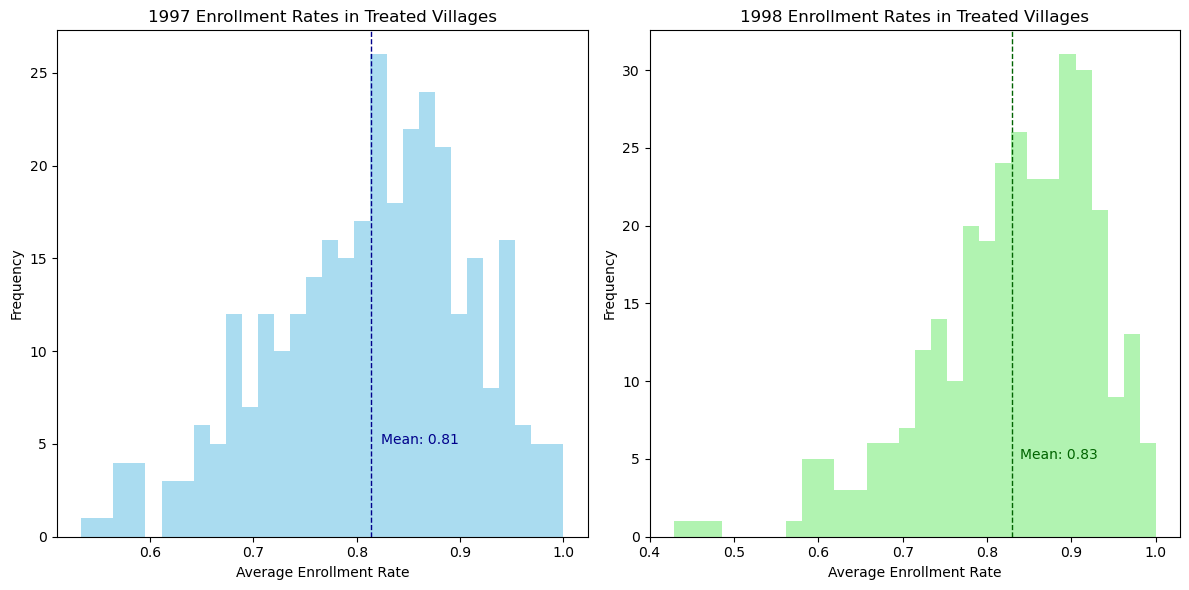

In [5]:
# Your code here
data_1_4 = data_1_2

t_village = data_1_4[(data_1_4.progresa==1)&(data_1_4.poor==1)]
avg_1997 = t_village[t_village.year == 97].groupby('village')['sc'].mean()
avg_1998 = t_village[t_village.year == 98].groupby('village')['sc'].mean()

# plotting
# plt.figure()
plt.figure(figsize=(12,6))
# 1997
plt.subplot(1, 2, 1)
plt.hist(avg_1997, bins=30, color='skyblue', alpha=0.7)
plt.axvline(avg_1997.mean(), color='darkblue', linestyle='dashed', linewidth=1)
plt.text(avg_1997.mean() + 0.01, 5, f'Mean: {avg_1997.mean():.2f}', color='darkblue')
plt.title('1997 Enrollment Rates in Treated Villages')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Frequency')

# 1998
plt.subplot(1, 2, 2)
plt.hist(avg_1998, bins=30, color='lightgreen', alpha=0.7)
plt.axvline(avg_1998.mean(), color='darkgreen', linestyle='dashed', linewidth=1)
plt.text(avg_1998.mean() + 0.01, 5, f'Mean: {avg_1998.mean():.2f}', color='darkgreen')
plt.title('1998 Enrollment Rates in Treated Villages')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

*Discuss your results here*  

Yes. The average enrollment rate in 1998 is higher compared to 1997. 
However, to determine whetheer the difference is statistically significant, a t-test would be needed.

### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

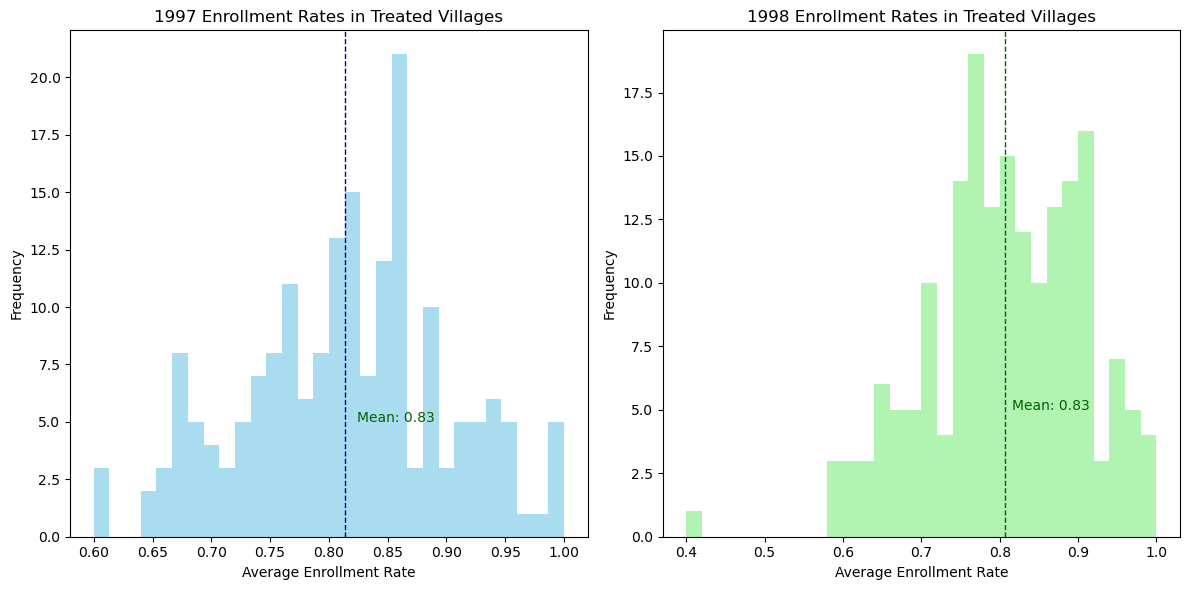

In [6]:
c_village = data_1_4[(data_1_4.progresa==0)&(data_1_4.poor==1)]
avg_1997_2 = c_village[c_village.year == 97].groupby('village')['sc'].mean()
avg_1998_2 = c_village[c_village.year == 98].groupby('village')['sc'].mean()

# plotting
# plt.figure()
plt.figure(figsize=(12,6))
# 1997
plt.subplot(1, 2, 1)
plt.hist(avg_1997_2, bins=30, color='skyblue', alpha=0.7)
plt.axvline(avg_1997_2.mean(), color='darkblue', linestyle='dashed', linewidth=1)
plt.text(avg_1997_2.mean() + 0.01, 5, f'Mean: {avg_1998.mean():.2f}', color='darkgreen')
plt.title('1997 Enrollment Rates in Treated Villages')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Frequency')

# 1998
plt.subplot(1, 2, 2)
plt.hist(avg_1998_2, bins=30, color='lightgreen', alpha=0.7)
plt.axvline(avg_1998_2.mean(), color='darkgreen', linestyle='dashed', linewidth=1)
plt.text(avg_1998_2.mean() + 0.01, 5, f'Mean: {avg_1998.mean():.2f}', color='darkgreen')
plt.title('1998 Enrollment Rates in Treated Villages')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

*Discuss your results here*  
No. The mean remains the same. This ensure that changes in the treatment group are likely due to the intervention rather than other external factors.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [7]:
# Your code here
data_2_1 = data_1_4
t_village_98 = data_2_1[(data_2_1.year == 98)&(data_2_1.progresa == 1)&(data_2_1.poor==1)]
c_village_98 = data_2_1[(data_2_1.year == 98)&(data_2_1.progresa == 0)&(data_2_1.poor==1)]
print(t_village_98.head(3))
print(c_village_98.head(3))
t_mean = t_village_98['sc'].mean()
c_mean = c_village_98['sc'].mean()
print("the average enrollment rate of treatment group is: ",t_mean)
print("the average enrollment rate of control group is: ",c_mean)
t_stat, p_value = ttest_ind(t_village_98['sc'].dropna(),c_village_98['sc'].dropna(),equal_var=False)
print(p_value)

    year  sex  indig  dist_sec   sc  grc  fam_n    min_dist    dist_cap  poor  \
7     98  0.0    0.0     3.154  0.0  6.0      6  127.114780  154.196003     1   
9     98  1.0    0.0     3.373  1.0  2.0      5   85.300272  105.878669     1   
11    98  0.0    0.0     3.373  1.0  3.0      5   85.300272  105.878669     1   

    ...  hohedu  hohwag  welfare_index  hohsex  hohage  age  village  folnum  \
7   ...       4     0.0      684.00000     1.0    85.0   15      271       4   
9   ...       6   875.0      742.14001     1.0    26.0   10      263       5   
11  ...       6   875.0      742.14001     1.0    26.0    8      263       6   

    grc97  sc97  
7       6   0.0  
9       2   1.0  
11      2   1.0  

[3 rows x 21 columns]
   year  sex  indig  dist_sec   sc  grc  fam_n   min_dist   dist_cap  poor  \
1    98  0.0    0.0     4.473  1.0  8.0      7  21.168384  21.168384     1   
3    98  1.0    0.0     4.473  1.0  7.0      7  21.168384  21.168384     1   
5    98  0.0    0.0     4

*Discuss your results here*  
The p-value is less than 0.05, which determines the difference is statistically significant. Thus, it can be concluded that PROGRESA would have positive effect on the average enrollment rate.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that a person with no technical background could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [8]:
# Your code here
import statsmodels.api as sm

data_2_2 = data_1_4[(data_1_4.year == 98)&(data_1_4.poor == 1)]
data_2_2_2 = data_2_2.dropna(subset = ['progresa','sc'])
X = data_2_2_2['progresa']
y = data_2_2_2['sc']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           6.64e-17
Time:                        23:37:02   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8076      0.004    220.676      0.000       0.800       0.815
progresa       0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Discuss your results here*  

* Based on the model, the coefficient for progresa is 0.0388, with a standard error of 0.005. In plain language, this means that being in a village treated with the Progresa program is associated with an increase in the likelihood of a child's enrollment in school by approximately 3.88 percentage points.
* It's similar. However, the regression model provides a more precise estimate as it accounts for the variance in the enrollment rate explained by the treatment, while the t-test compares the means of two independent samples.
* Given the p-value associated with the progresa coefficient is 0.000 (less than any standard significance level like 0.01, 0.05, or 0.10), we can reject the null hypothesis that Progresa had no effect on enrollment rates. And there's actually a positive impact of the Progresa program.
* The counterfactual assumption in this regression is that in the absence of the Progresa program, there would have been no difference in enrollment rates between the treatment and control groups, or the difference would have remained constant over time. 

### 2.3 Multiple Regression

Estimate the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [9]:
# Your code here
data_2_2_3 = data_2_2.dropna(subset = ['progresa','age', 'dist_sec', 'sex', 'hohedu', 'welfare_index', 'indig','sc'])
control_vars = data_2_2_3[['progresa', 'age', 'dist_sec', 'sex', 'hohedu', 'welfare_index', 'indig']]
y_3 = data_2_2_3['sc']
control_vars = sm.add_constant(control_vars)
# X_clean = control_vars.dropna()
# y_clean = y.loc[X_clean.index]

model_c = sm.OLS(y_3,control_vars).fit()

model_c_summary = model_c.summary()
print(model_c_summary)

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:37:02   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5025      0.014    105.342

*Discuss your results here*  
* The point estimate of the treatment effect for progresa is 0.0352 when control variables are included, which is different from the initial model without controls (where it was 0.0388). This implies a negative effect of the control variables on the progresa.
* The standard error for the progresa coefficient is 0.004, which is slightly lower than in the initial model without controls (which was 0.005). This suggests that including control variables has made the estimate of the treatment effect more precise.
* As mentioned above, the treatment effect estimate remains similar in magnitude and significance when control variables are added, this suggests that the treatment effect is robust and not confounded by those variables. However, it should also be noticed that the the model will be more precise when taking the control variables into consideration.
* The coefficient for dist_sec is -0.0117, which indicates that as the distance to the nearest secondary school increases by one unit (likely one kilometer, based on the context), the likelihood of school enrollment decreases by 1.17 percentage points. While this relationship is statistically significant, it does not necessarily imply causation. It shows a strong association between distance and enrollment, but to prove causality, we would need to eliminate the possibility of all other confounding variables influencing this relationship. 

### 2.4 Multiple Regression Revisited

For the same set of control variables that you used in 2.3, carry out the following alternative estimation procedure. 

* First, regress the 1998 enrollment of the poor on the control variables, **without including the treatment assignment.** 
* Second, use this model to obtain predicted values of the 1998 enrollment for each child in the sample used to estimate the model in step 1. 
* Third, compute a new value for each child, which is the difference between the actual 1998 enrollment and the predicted enrollment value from step 2. 
* Finally, regress the difference from step 3 on treatment assignment.

Compare the point estimate and the standard error on treatment assignment that you obtained in step 4 to their analogues in 2.3. Explain the results.

In [10]:
# Your code here
data_2_4 = data[(data.year == 98)&(data.poor == 1)]
data_2_4_1 = data_2_4.dropna(subset = ['age', 'dist_sec', 'sex', 'hohedu', 'welfare_index', 'indig','sc'])
x_4 = data_2_4_1[['age', 'dist_sec', 'sex', 'hohedu', 'welfare_index', 'indig']]
y_4 = data_2_4_1['sc']
x_4 = sm.add_constant(x_4)

model_4 = sm.OLS(y_4,x_4).fit()

model_4_summary = model_4.summary()
print("step 1 model:",model_4_summary)
## step2
predicted_2 = model_4.predict(x_4)
## step3
difference = y_4 - predicted_2
# print(difference.head(3))
## step4
x_4_2 = sm.add_constant(data_2_4.loc[x_4.index,'progresa'])
model_4_2 = sm.OLS(difference, x_4_2).fit()
print("step 4 model:",model_4_2.summary())

step 1 model:                             OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     1638.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:37:03   Log-Likelihood:                -7678.0
No. Observations:               27267   AIC:                         1.537e+04
Df Residuals:                   27260   BIC:                         1.543e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5269      0.

*Discuss your results here*  
It remains the same. The treatment effect of Progresa on school enrollment is consistent across different approaches. This robustness adds credibility to the finding that Progresa has a significant impact on school enrollment rates among the poor. The treatment effect of Progresa on school enrollment is consistent across different methodological approaches. This robustness adds credibility to the finding that Progresa has a significant impact on school enrollment rates among the poor.  
While regression analysis on observational data can never fully prove causation, consistent results across different methodological approaches strengthen the argument for a causal relationship between Progresa and increased school enrollment.

### 2.5 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [11]:
# Your code here
data_2_5 = data[data.poor == 1]
avg_enroll = data_2_5.groupby(['progresa', 'year'])['sc'].mean().unstack()
print(avg_enroll)

year            97        98
progresa                    
0         0.815186  0.807637
1         0.822697  0.846479


*Discuss your results here*  

In control group(1997-1998): enrollment rates changed from 0.807637.
In treatment gropu(1997-1998): enrollment rates changed form 0.8222697 to 0.846479.
And the DiD estimate is :
$$DiD = (0.846479−0.822697)−(0.807637−0.815186)=0.031331$$
The DiD estimate suggests that the Progresa increased school enrollment rates among poor households in the districts by around 3.1 percentage points, after controlling for unobserved factors that do not vary over time.
Compared to the simple difference results, the DiD can control for time-invariant unobserbed heterogeneity.
The counterfactual assumption underlying this estimate is that without the Progresa program, the change in enrollment rates over time for the treatment group would have been the same as the change observed in the control group(parallel trends assumption).

### 2.6 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [12]:
# Your code here
import statsmodels.formula.api as smf
data_2_6=data
# (i)
data_2_6['treatment_post'] = data_2_6['progresa']* (data_2_6['year'] == 98)
## Define the model
model_i = smf.ols('sc ~ progresa + C(year) + treatment_post', data=data_2_6[data_2_6['poor'] == 1]).fit()
print(model_i.summary())

# (ii)
model_ii = smf.ols('sc ~ progresa + C(year) + treatment_post + age + dist_sec + sex + hohedu + indig', data=data_2_6[data_2_6['poor'] == 1]).fit()
print(model_ii.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.76e-18
Time:                        23:37:03   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8152      0.003    233.

*Discuss your results here*  
1. * The coefficient for progresa is 0.0075 with a standard error of 0.004. This suggests that, on its own, being in the Progresa program is associated with an increase in the likelihood of a child's enrollment in school by 0.75 percentage points. However, this effect is not statistically significant at conventional levels (p-value = 0.091), which means we do not have enough evidence to confidently say that Progresa has had an effect on school enrollment when not considering the time dimension.
   *  The coefficient for treatment_post is 0.0313 with a standard error of 0.006. This is the DiD estimate and suggests that the Progresa program, after accounting for the time effect, is associated with an increase in school enrollment by 3.13 percentage points from 1997 to 1998 for poor households. This effect is statistically significant (p-value = 0.000), which indicates a strong and significant impact of the program when comparing the change over time between the treatment and control groups.
2. *  The point estimate for the Progresa effect has decreased slightly from 0.0075 to 0.0043. This reduction implies that part of the effect captured by the progresa variable alone may be explained by other factors that are now included in the model. The Progresa coefficient is not statistically significant in either model. However, the p-value has increased from 0.091 to 0.256, indicating even less statistical evidence for a Progresa effect when controlling for other variables.
   *  The inclusion of control variables, which show significant associations with enrollment, implies that these factors (like age, distance to school, gender, household head's education, and indigenous status) are important in determining school enrollment. They may overshadow the isolated impact of the Progresa program.
3. * After considering the control variables, the coefficient of progresa decreased from 0.0354 to 0.0314, but remains positive. The initial model without control variables might have over-estimated the effect of Progresa if it failed to account for other important factors that influence enrollment. It suggestes that we have to include all relevant variables that explain the outcome.
4. * The counterfactual assumption in regression model ii is that, in the absence of Progresa, the relationship between the control variables (age, distance to school, sex, household head's education, etc.) and the likelihood of school enrollment would be the same for the treatment group as for the control group. That means, including the control variables, the differences in enrollment rates betweem the Progresa and non-Progresa groups can be attributed to the Progresa program itself.

### 2.7 Spillover effects

Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [13]:
# Your code here
# (a)
data_2_7 = data[data.poor == 0]
avg_enroll_a = data_2_7.groupby(['progresa', 'year'])['sc'].mean().unstack()
print(avg_enroll_a)
DiD_a = (avg_enroll_a.loc[1, 98] - avg_enroll_a.loc[1, 97]) - (avg_enroll_a.loc[0, 98] - avg_enroll_a.loc[0, 97])
print("DiD_a is: ", DiD_a)
# (b)
# I chose grc that may be affected by the PROGRESA program.
data_2_7_b = data[data.poor == 1]
avg_enroll_b = data_2_7_b.groupby(['progresa', 'year'])['grc'].mean().unstack()
print(avg_enroll_b)
DiD_b = (avg_enroll_b.loc[1, 98] - avg_enroll_b.loc[1, 97]) - (avg_enroll_b.loc[0, 98] - avg_enroll_b.loc[0, 97])
print("DiD_b is: ", DiD_b)

year            97        98
progresa                    
0         0.762587  0.776337
1         0.795264  0.809049
DiD_a is:  3.4275264633842895e-05
year            97        98
progresa                    
0         3.543050  4.130410
1         3.531599  4.140968
DiD_b is:  0.022008154356015552


*Discuss your results here*
* I haven't noticed any impacts of PROGRESA on the school enrollment of the non-poor according to the $DiD_a = 3.4275264633842895e-05$.
* The first reason I think is that poor families may use these transfer payments to purchase local goods and services, thereby increasing the income of shops and businesses owned by non poor families.
* The second reason is that since the PROGRESA encourage community participation, like health education sessions, it might strengthen networks of support and information exchangee across socio-economic boundaries, which cna lead to shared benefits, such as improved safety and cooperative community projects that enhance the local environment or infrastructure, indirectly benefiting non-poor households as well.
* I choose the 'grc' index. According to the $DiD_b = 0.022$, it indicates s a positive effect of PROGRESA on advancing grade levels beyond the natural improvement. 

### 2.8 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 

*Discuss your results here*   

I think I could believe because multiple analyses with different control variables and methods consistently show that Progresa is associated with increased enrollment. But we still need further analysis on the dataset. It's the consistency and replication of the findings that give us a reasonable basis to infer a causal relationship, especially when alternative explanations have been rigorously tested and ruled out.